# BUSINESS CASE :- To predict the Rice Leaf Disease using CNN.

## DOMAIN ANALYSIS

### RICE LEAF DISEASE:

##### Bacterial leaf blight:- 
Rice bacterial blight, also called bacterial blight of rice, deadly bacterial disease that is among the most destructive afflictions of cultivated rice (Oryza sativa and O. glaberrima). In severe epidemics, crop loss may be as high as 75 percent, and millions of hectares of rice are infected annually.

##### Brown spot:- 
Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed. 

##### Leaf smut:- 
Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice. The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves (Figure 1). Although rare, it also can produce spots on leaf sheaths.

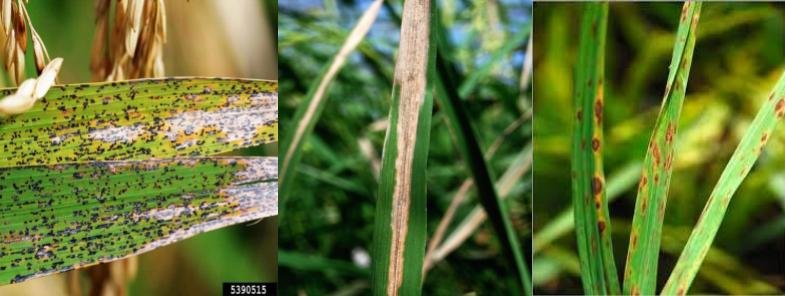

                     a) Leaf smut                   b)Bacterial Leaf Blight               c)Brown Spot


### DATA SUMMARY
This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

* Leaf smut
* Brown spot
* Bacterial leaf blight

### IMPORTING NECESSARY LIBRARY

In [ ]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [ ]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [ ]:
# Installing split-folder
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/CNN PROJECT /RiceLeaf-Disease-Detector-mukesh/RiceLeaf-Disease-Detector-mukesh/bacterical disease", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 120 files [00:42,  2.83 files/s]


In [ ]:
# Sorting the path of data into variable
train_dir = '/content/output/train'  #Location of training images
validation_dir = '/content/output/val' # Location of test images
test_dir ='/content/output/test' # Location of test images

## DATA AUGMENTATION

* Here we are performing data augmentation in order to increase the samples in data.

In [ ]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')




    




Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


* Here we are plotting the images to visualize the images.

In [ ]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

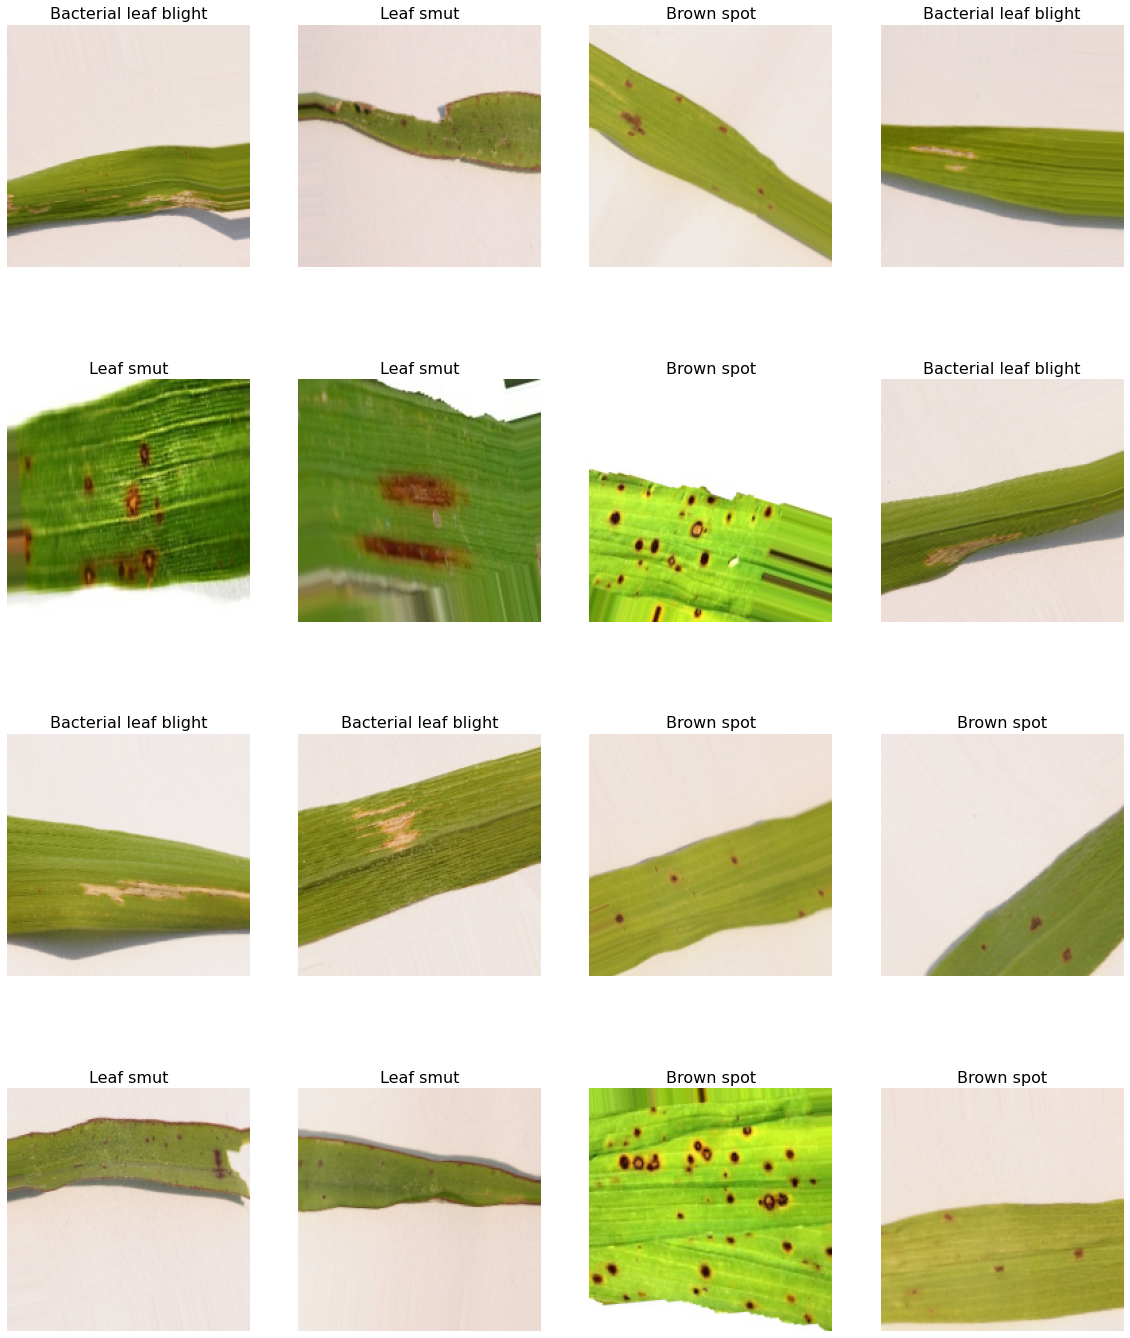

In [ ]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [ ]:
# Creating the Basic Architecture of CNN Model
from keras.layers.core.activation import Activation
from keras import models, layers
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = models.Sequential()
# Adding input Layer:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))

# Adding MaxPooling layer:
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Adding Convolutional layer:
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))

# Adding MaxPooling layer:
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Adding Convolutional layer:
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))

# Adding MaxPooling layer:
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Adding Convolutional layer:
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))

# Adding MaxPooling layer:
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Adding Dropout layer:
model.add(layers.Dropout(rate=0.5))

# Adding Flattening layer:
model.add(layers.Flatten())

# Adding Output layer with "Softmax" Activation Function:
model.add(layers.Dense(3, activation ='softmax'))


### PLOTTING GRAPHICAL REPRESENTATION OF MODEL

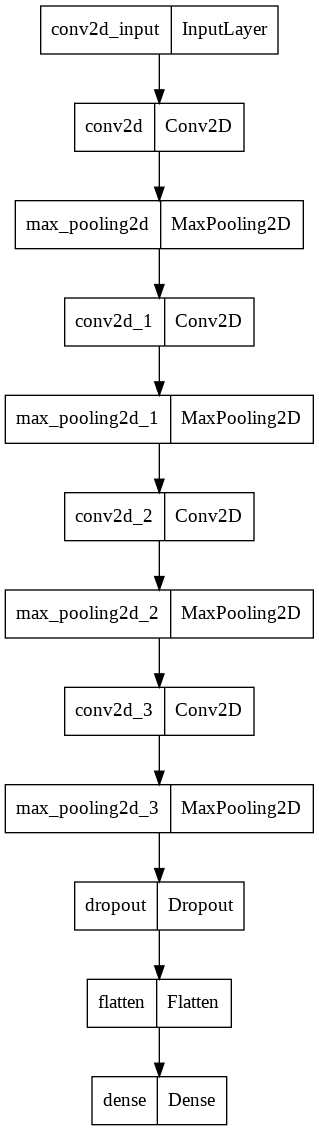

In [ ]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model)

### SUMMARY OF MODEL

In [ ]:
# Checking Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

### COMPILING MODEL:

In [ ]:
# Compiling the model
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### TRAINING MODEL:

In [ ]:
# Fitting the data

callbacks=[keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch229.keras",save_best_only=True,monitor='val_loss')]
    
history = model.fit_generator(train_generator,
    epochs=150, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,callbacks = callbacks
)

Epoch 1/150
6/6 [==============================] - 15s 581ms/step - loss: 1.1442 - accuracy: 0.2917 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 2/150
6/6 [==============================] - 3s 571ms/step - loss: 1.0952 - accuracy: 0.3542 - val_loss: 1.0867 - val_accuracy: 0.4167
Epoch 3/150
6/6 [==============================] - 3s 571ms/step - loss: 1.0517 - accuracy: 0.4271 - val_loss: 1.0692 - val_accuracy: 0.3333
Epoch 4/150
6/6 [==============================] - 3s 577ms/step - loss: 0.9885 - accuracy: 0.4583 - val_loss: 1.1376 - val_accuracy: 0.3333
Epoch 5/150
6/6 [==============================] - 3s 567ms/step - loss: 0.9659 - accuracy: 0.5625 - val_loss: 1.1253 - val_accuracy: 0.4167
Epoch 6/150
6/6 [==============================] - 3s 543ms/step - loss: 0.9162 - accuracy: 0.5833 - val_loss: 1.1208 - val_accuracy: 0.5833
Epoch 7/150
6/6 [==============================] - 4s 608ms/step - loss: 0.9969 - accuracy: 0.5417 - val_loss: 1.0331 - val_accuracy: 0.3333
Epoch 8/150


### AFTER TRAINING
* Validation accuracy.91.67%
* Training accuracy.84.38%

### MODEL SAVING

In [ ]:
model.save("model123.h5")

### PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

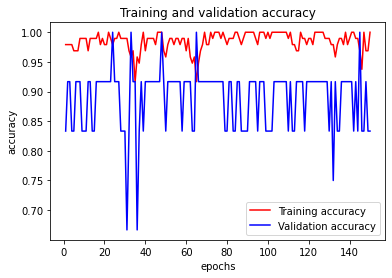

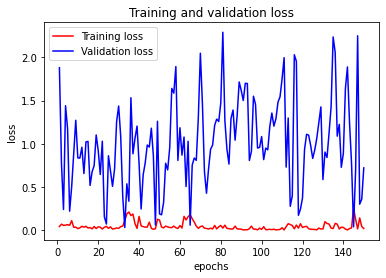

In [ ]:
# Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### CREATED MODEL SUMMARY

In [ ]:
# Model summary of the saved model
model = tf.keras.models.load_model("/content/convnet_from_scratch229.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

### EVALUATION AND TESTING MODEL

In [ ]:
# Evaluation of model
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 12 images belonging to 3 classes.


In [ ]:
# Checking the final accuracy 
model.evaluate(test_generator)


1/1 [==============================] - 0s 423ms/step - loss: 0.6416 - accuracy: 0.7500


[0.6415606141090393, 0.75]

* Here the loss is 0.53 and the accuracy of the model is 0.91 percent means 91%.

### VISUALISE THE PREDICTION OF MODEL

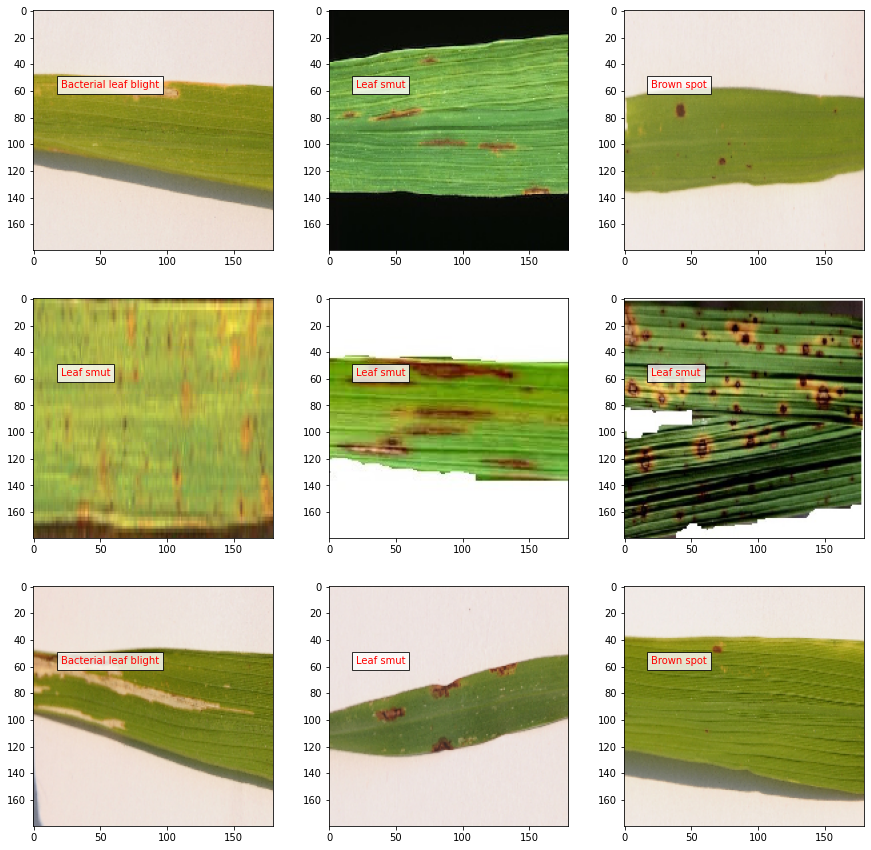

In [ ]:
# Visualizing the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])




## CONCLUSION: